# MTH9879 Homework 7
#### Name: ShengQuan Zhou

Assigned: March 29, 2017.
Due: April 25, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### 0. (0 points) 
Read Sections 4, 5 and 6 of Bouchaud, Farmer and Lillo.

## Long memory

### 1. (6 points)

Consider the long memory process

$$
X_T=\sum_{i=1}^T\,\epsilon_i
$$

with autocovariance function $\gamma(\tau)=\E[\epsilon_i\,\epsilon_{i-\tau}] \sim \tau^{-\alpha}$.  Show that as $\tau \to \infty$,

$$
\Var[X_{t+\tau}-X_t] \sim \tau ^{2\,H}
$$

where the Hurst exponent $H$ is given by

$$
H=1-\frac{\alpha}{2}.
$$

#### Solution:

\begin{align}
\text{Var}[X _ {t+\tau} - X_t] &= \text{Var}\left[\sum _ {i=t+1}^{t+\tau} \epsilon_i\right]\\
&= \mathbb{E}\left[\left(\sum _ {i=t+1}^{t+\tau} \epsilon_i\right)^2\right]\\
&= \mathbb{E}\left[\sum _ {i=t+1}^{t+\tau}\sum _ {j=t+1}^{t+\tau} \epsilon_i \epsilon_j\right]\\
&= \sum _ {i=t+1}^{t+\tau}\sum _ {j=t+1}^{t+\tau}\mathbb{E}\left[ \epsilon_i \epsilon_j\right]\\
&= \sum _ {i=t+1}^{t+\tau}\sum _ {j=t+1}^{t+\tau}\gamma(|i-j|)\\
&= \sum _ {i=1}^{\tau}\sum _ {j=1}^{\tau}\gamma(|i-j|)\\
&= \sum _ {i=1}^{\tau} \gamma(0) + \sum _ {i\neq j=1}^{\tau}\gamma(|i-j|)\\
&\sim \tau\gamma(0) + \sum _ {i\neq j=1}^{\tau}\frac{1}{|i-j|^{\alpha}}\\
&\sim 2\sum _ {i=1}^{\tau} \sum _ {j=1}^{i-1} \frac{1}{|i-j|^{\alpha}}\\
&\sim \sum _ {i=1}^{\tau} \sum _ {k=1}^{i-1} \frac{1}{k^{\alpha}}\\
&\sim \sum _ {i=1}^{\tau} \int_1^{i-1} \frac{dk}{k^{\alpha}}\\
&\sim \sum _ {i=1}^{\tau} \frac{1}{(i-1)^{\alpha-1}} \\
&\sim \int_0^{\tau-1} \frac{di}{i^{\alpha-1}} \\
&\sim \frac{1}{(\tau-1)^{\alpha-2}}\\
&\sim \frac{1}{\tau^{\alpha-2}}\\
&= \tau^{2H},
\end{align}
where $H=1-\frac{\alpha}{2}$.

## MSFT data from Alejandro Ca&ntilde;ete

In [1]:
library(highfrequency)
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip", destfile="MSFT130311.zip")
unzip(zipfile="MSFT130311.zip")
load("MSFT130311.rData")

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



### 2. (10 points)

(a) Generate the series *tradeSign* of trade signs from the *msft130311.inet* data frame.

(b) Fit an AR(1) model to the *tradeSign*  data to give the forecast:
    $$
    \hat \epsilon^{(1)}_t=\phi_1\,\epsilon_{t-1}
    $$

(c) How does $\phi_1$ relate to the autocorrelation coefficients of *tradeSign*?  What is the mean-squared error of this AR(1) forecast?

(d) Fit an $AR(p)$ model to the *tradeSign* data, allowing R to find the best value of $p$ using the default AIC criterion.  This generates the forecast:
    $$
    \hat \epsilon^{(2)}_t=\sum_{k=1}^p\,\phi_k\,\epsilon_{t-k}.
    $$

(e) What value of $p$ is selected by R?  What is the mean-squared error of this AR(p) forecast?


#### Solution (a):

In [2]:
tail(data.frame(msft130311.inet))

,signed.shares,trade.price
16053,-4000,27.86
16054,-4000,27.85
16055,100,27.87
16056,200,27.87
16057,-400,27.87
16058,-20,27.87


In [3]:
tradeSign = sign(msft130311.inet$signed.shares)

#### Solution (b):

In [4]:
res <- ar(tradeSign, order.max=1, demean=FALSE)

In [5]:
res$ar

[1] 0.8223315

Thus, $\phi_1 \approx 0.822$.

The forecast can be written as
$$
\hat{\epsilon}_t = \phi_1\epsilon_{t-1} \approx  0.822\times (-1) \approx -0.822 \approx -1.
$$

#### Solution (c):

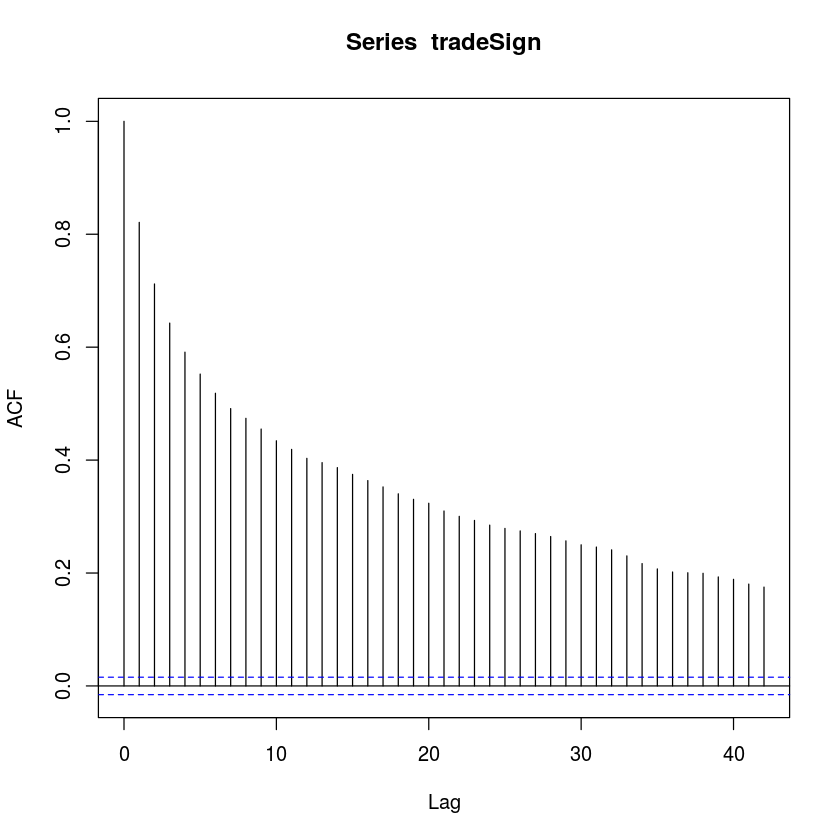

In [6]:
acfSign <- acf(tradeSign)

In [7]:
acfSign[1]


Autocorrelations of series ‘tradeSign’, by lag

    1 
0.821 

Thus, $\phi_1$ equals approximately to the autocorrelation function at lag 1. If the AR fit had been done with an intercept, the equality would be exact according to $\rho = \frac{\gamma_1}{\gamma_0}$.

#### Solution (d):

In [14]:
res2 <- ar(tradeSign, aic=TRUE, demean=FALSE)

In [15]:
phi <- res2$ar

In [18]:
res2


Call:
ar(x = tradeSign, aic = TRUE, demean = FALSE)

Coefficients:
      1        2        3        4        5        6        7        8  
 0.6958   0.0372   0.0417   0.0183   0.0234   0.0044  -0.0005   0.0298  
      9       10       11       12       13       14       15       16  
 0.0107  -0.0083   0.0145  -0.0140   0.0225   0.0121  -0.0005   0.0057  
     17       18       19       20  
 0.0047  -0.0043   0.0003   0.0165  

Order selected 20  sigma^2 estimated as  0.3116

#### Solution (e):

The $p$ value selected by R is 20. The mean-squared error is 0.3116.

### 3. (8 points)

(a) Bin the AR(p) forecast data from the previous problem by forecast sign with bin-breaks from -1.01 to 1.01 in steps of 0.02.

(b) Plot the average actual order sign in each bin against the average forecast order sign.  What is the slope of the resulting graph? (Hint: use the R function *lm*).

(c) If the expected order sign is $\hat \epsilon$, what is the probability $p$ that the next trade will be a market buy?

#### Solution (a):

<font color="red">Note: in this problem, we are using the AR(p) fit without intercept.</font>

In [19]:
# the order of AR(p)
order <- length(phi)
# number of observations
size <- length(tradeSign)
# initialize an array of predicted trade signs
tradeSignPrediction <- rep(0, size)

for (i in (order+1) : size)
{
    tradeSignPrediction[i] = 0
    for (j in 1 : order)
    {
        tradeSignPrediction[i] = tradeSignPrediction[i] + phi[j]*tradeSign[i-j]
    }
}

tradeSignPredictionTruncated <- tradeSignPrediction[-(1:order)]

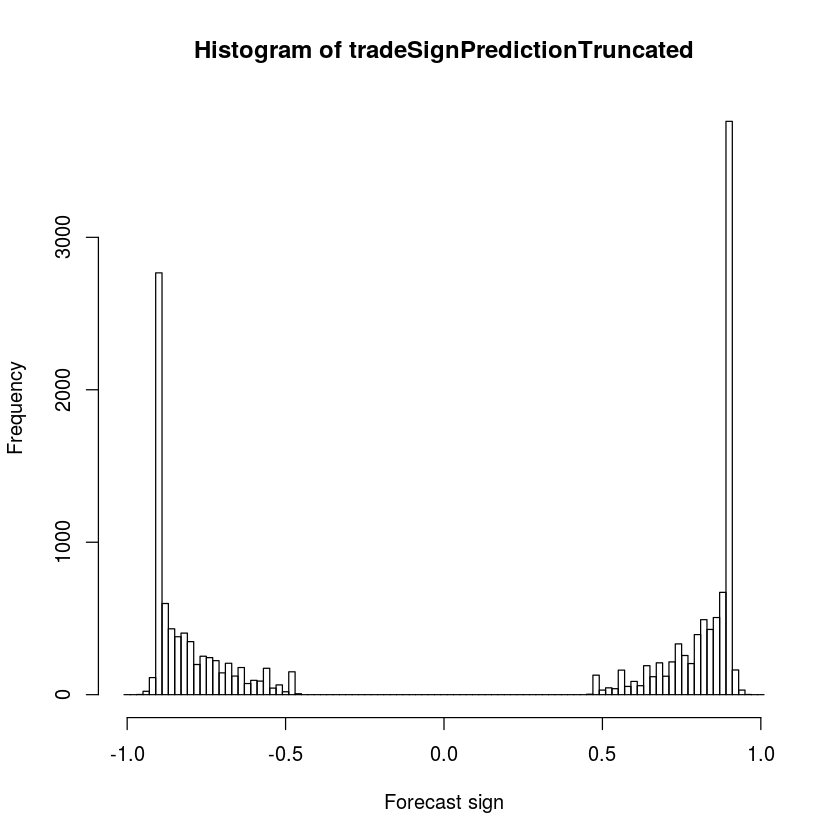

In [20]:
hist(tradeSignPredictionTruncated, breaks = seq(-1.01,1.01,by=0.02),xlab="Forecast sign")

#### Solution (b):

In [21]:
leftBoundary <- -1.01
rightBoundary <- 1.01
binWidth <- 0.02
numBins <- (rightBoundary-leftBoundary)/binWidth
actualSigns <- rep(0, numBins)
predictedSigns <- rep(0, numBins)
count <- rep(0, numBins)

# cumulative order sign
for (j in (order+1) : size)
{
    v <- tradeSignPrediction[j]
    i <- as.integer((v - leftBoundary)/binWidth)
    actualSigns[i] = actualSigns[i] + tradeSign[j]
    predictedSigns[i] = predictedSigns[i] + tradeSignPrediction[j]
    count[i] = count[i] + 1
}

# normalize to get the average order sign
for (i in 1:numBins)
{
    actualSigns[i] = actualSigns[i]/count[i]
    predictedSigns[i] = predictedSigns[i]/count[i]
}

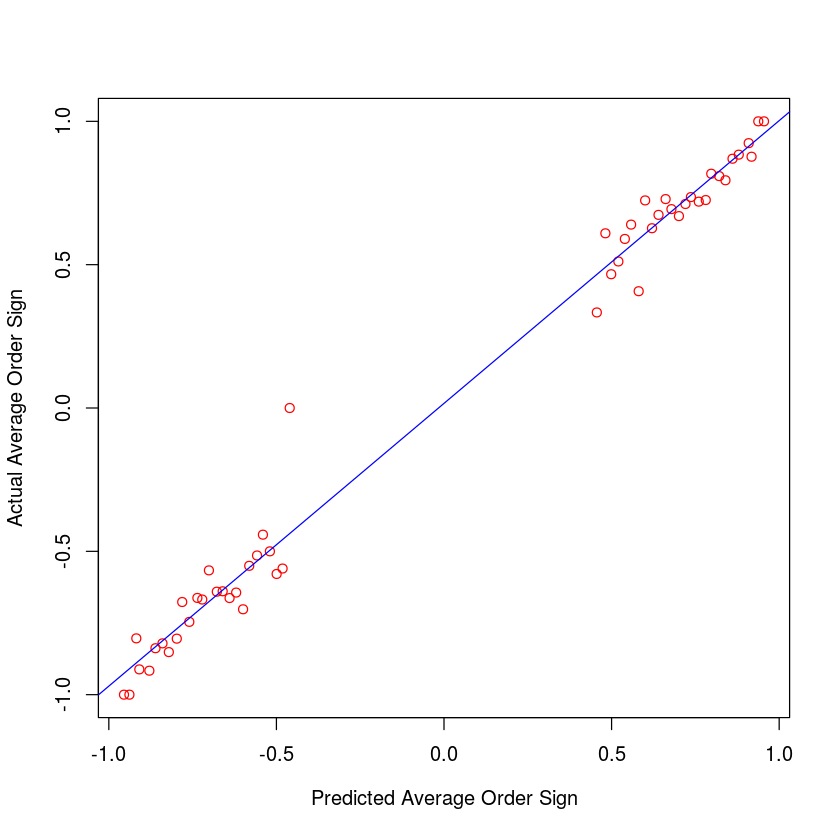

In [22]:
# linear regression to estimate the slop
res3 <- lm(actualSigns~predictedSigns)
plot( predictedSigns, actualSigns,type="p", col="red", xlab=expression("Predicted Average Order Sign"), ylab="Actual Average Order Sign")
abline(res3, col='blue')

In [23]:
res3


Call:
lm(formula = actualSigns ~ predictedSigns)

Coefficients:
   (Intercept)  predictedSigns  
        0.0162          0.9863  


Slope $\approx 0.9863$.

#### Solution (c):

$$
\hat \epsilon = 1 \times p + (-1) \times (1-p) = 2p-1
$$

The probability p that the next trade will be a market buy is

$$
p = \frac{\hat \epsilon + 1}{2}.
$$